Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:

library(tidymodels)


Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.1     ✔ workflows    1.3.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:

glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 1, 8, 1, 5, 5, 3, 10, 4, 3, 7, 1…
$ Glucose                  <dbl> 89, 116, 115, 110, 103, 99, 97, 117, 109, 88,…
$ BloodPressure            <dbl> 66, 74, 0, 92, 30, 84, 66, 92, 75, 58, 78, 60…
$ SkinThickness            <dbl> 23, 0, 0, 0, 38, 0, 15, 0, 26, 11, 31, 33, 25…
$ Insulin                  <dbl> 94, 0, 0, 0, 83, 0, 140, 0, 0, 54, 0, 192, 70…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 43.3, 35.4, 23.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 0.183, 0.388, 0.4…
$ Age                      <dbl> 21, 30, 29, 30, 33, 50, 22, 38, 60, 22, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Outcome looks to be the suitable "outcome" variable. This is a binary that classifies the whether or not an individual has diabetes.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

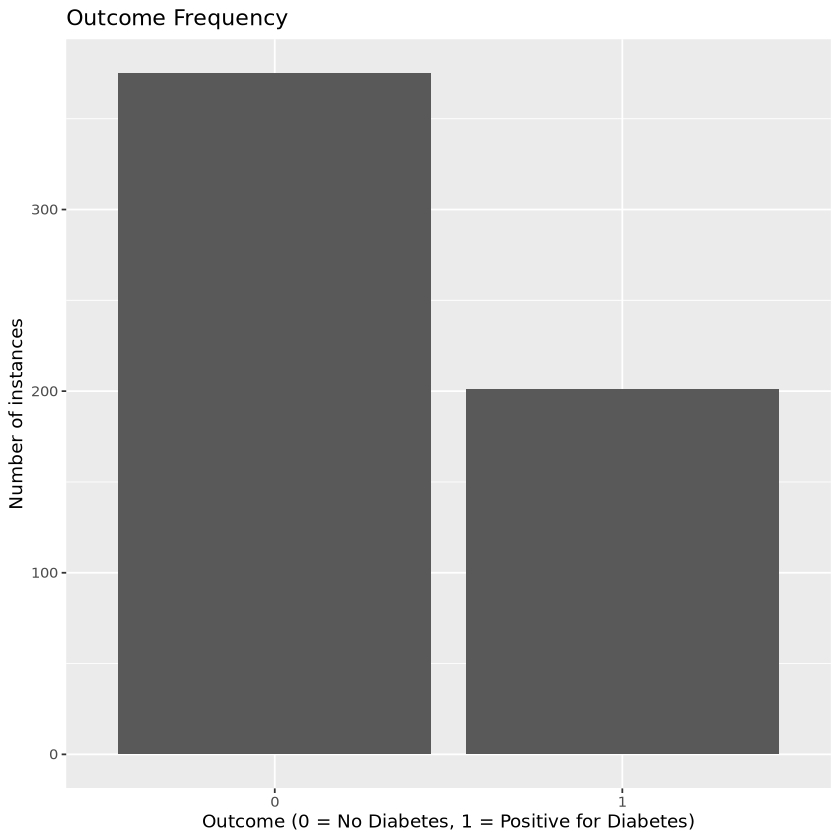

In [4]:
library(ggplot2)
ggplot(diabetes_train, aes(x=Outcome)) +
    labs(title="Outcome Frequency", x="Outcome (0 = No Diabetes, 1 = Positive for Diabetes)", y = 'Number of instances') +
    geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**


The outcome variable of the dataset is not balanced. There is roughly double the number of negative outcomes to positive.


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

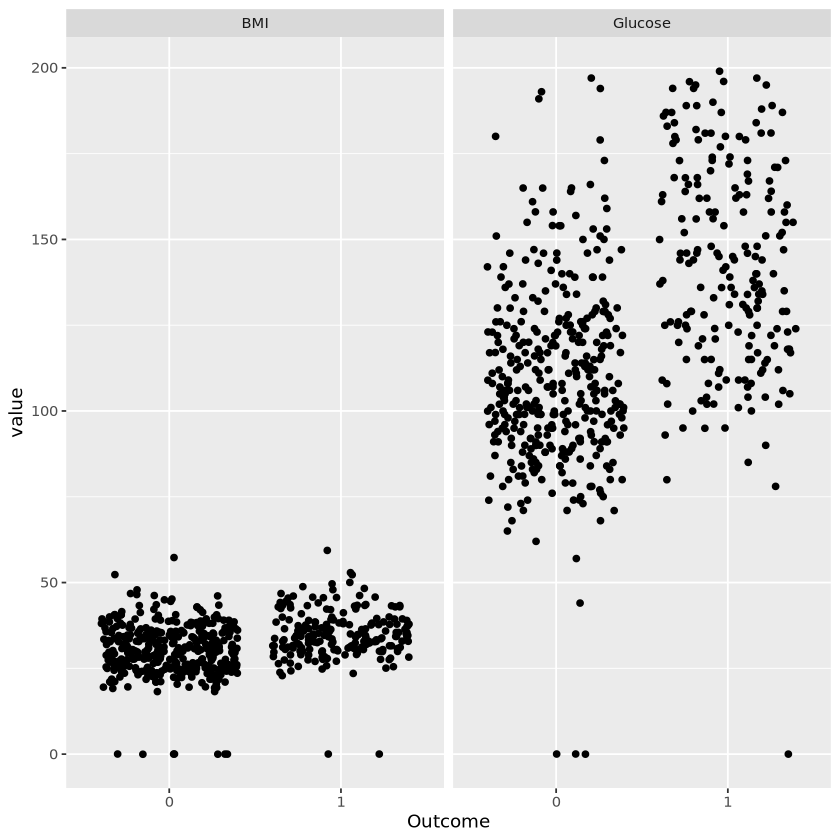

In [6]:
ggplot(plot_df, aes(x = Outcome, y = value)) +
    geom_jitter() + 
    facet_wrap(~name, ncol=2, scales='free_x')



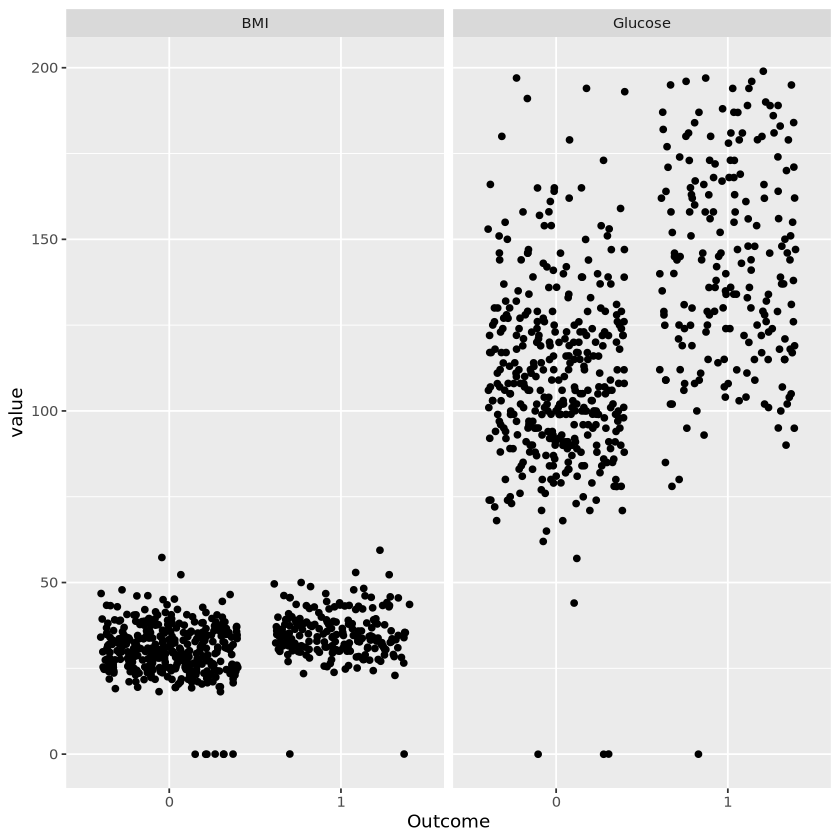

In [7]:
ggplot(plot_df, aes(x = Outcome, y = value)) +
    geom_jitter() + 
    facet_wrap(~name, ncol=2)

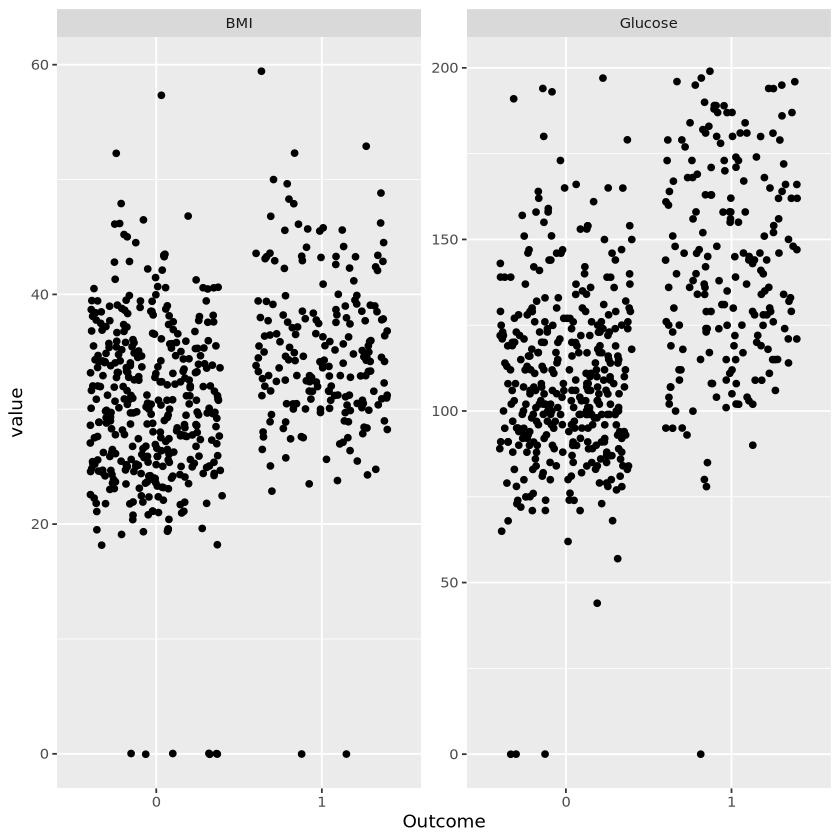

In [8]:
ggplot(plot_df, aes(x = Outcome, y = value)) +
    geom_jitter() + 
    facet_wrap(~name, ncol=2, scales='free_y')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

scales = 'free_x' allows the x-axis scale to be different between facets (the BMI and Glucose charts). It appears that the boundary between outcomes is slightly more defined, and data points are less likely to overlap. scales = 'free_y' gives independent y axes for glucose and BMI, therefore the clusters are not shortened by sharing the same scale.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [9]:
mod_fit <- glm(Outcome ~ BMI + Glucose, 
          data = diabetes_train,
          family = binomial)
summary(mod_fit)




Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial, data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.570254   0.695293 -10.888  < 2e-16 ***
BMI          0.068076   0.015677   4.342 1.41e-05 ***
Glucose      0.037827   0.003969   9.531  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 568.43  on 573  degrees of freedom
AIC: 574.43

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [10]:
diabetes_test_wPred <- augment(mod_fit, 
                               newdata = diabetes_test,
                               type.predict = 'response')

diabetes_test_wPred$.pred_class <- factor(ifelse(diabetes_test_wPred$.fitted > 0.5, 1, 0),
                                      levels = c(0, 1))



In [11]:
head(diabetes_test_wPred)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted,.pred_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,0,0.07282467,0
8,183,64,0,0,23.3,0.672,32,1,0.71876665,1
10,139,80,0,0,27.1,1.441,57,0,0.38523976,0
7,100,0,0,0,30.0,0.484,32,1,0.14865158,0
7,107,74,0,0,29.6,0.254,31,1,0.18128665,0
3,126,88,41,235,39.3,0.704,27,0,0.46789628,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [12]:
#diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  32
         1  15  35

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:** 
- 67 individuals had diabetes in the test data. 
- Of those that had diabetes, 35 were predicted by the model to have diabetes.
- 15 individuals were predicted to have diabetes that did not.